# Hw2

Visualization

Description

Create ipynb file that has code for: importing matplotlib & seaborn

importing lending club data (https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/loans_2007.csv), V rather than direct import from Git

prints a histogram for loan amount

prints a bar chart with sum of loan amount per purpose

prints a boxplot for loan amount, print median + min + max + Q1+ Q3 + outliers and comment your findings

print scatter plot for loans (y-axis for loans amount, x-axis for loan repayment term, color for purpose)

Upload your ipynb to peergrade (use comments, no additional pdf interpretation is needed)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
file = 'loans_2007.csv'

loan_table = pd.read_csv(file)

loan_table.head(5)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Histogram for loan amount

Text(0.5, 1.0, 'Histogram of loan amount')

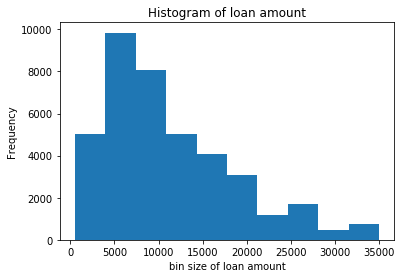

In [8]:
hist = loan_table['loan_amnt'].plot.hist(bins = 10) 
plt.xlabel("bin size of loan amount")
plt.title("Histogram of loan amount")

### bar chart with sum of loan amount per purpose

Creating table with loan amounts sumed by purpose

In [11]:
Purpose = [i for i in loan_table if i.startswith('purpose')]
Melted_table = pd.melt(loan_table, id_vars='loan_amnt', value_vars=Purpose , value_name='purpose')

Loan_purpose_table = Melted_table[Melted_table['purpose'] == 1].iloc[:, [0, 1] ]
loan_purpose_G = Loan_purpose_table.groupby('variable').sum().sort_values(by=['loan_amnt'], ascending=False)
loan_purpose_G['loan amnt in mil'] = (loan_purpose_G['loan_amnt'].astype(float)/1000000).round(2)
loan_purpose_G

,loan_amnt,loan amnt in mil
variable,,
purpose_debt_consolidation,231670025.0,231.67
purpose_credit_card,59139400.0,59.14
purpose_home_improvement,33798450.0,33.80
purpose_other,31418650.0,31.42
purpose_small_business,24200475.0,24.20
purpose_major_purchase,17824325.0,17.82
purpose_car,10335425.0,10.34
purpose_wedding,9259800.0,9.26
purpose_medical,5705600.0,5.71


Bar chart

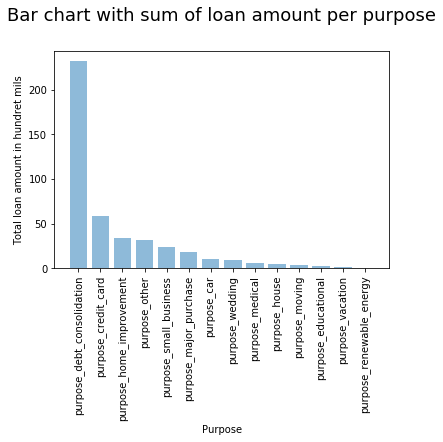

In [12]:
plt.bar(loan_purpose_G.index, loan_purpose_G['loan amnt in mil'], align='center', alpha=0.5)
plt.xticks(loan_purpose_G.index, rotation=90)
plt.ylabel('Total loan amount in hundret mils')
plt.xlabel('Purpose')
plt.title('Bar chart with sum of loan amount per purpose',   fontdict={'fontsize': 18}, pad=30)
plt.show()

### boxplot for loan amount, print median + min + max + Q1+ Q3 + outliers and comment your findings

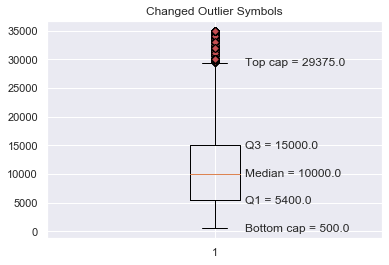

In [42]:
def make_labels(ax, boxplot):

    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    xpos = med.get_xdata()

    xoff = 0.10 * (xpos[1] - xpos[0])

    xlabel = xpos[1] + xoff

    median = med.get_ydata()[1]

    Q1 = iqr.get_ydata().min()
    Q3 = iqr.get_ydata().max()
    
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]
    
    #flier = fly.get_data()[-1]

    ax.text(xlabel, median,
            'Median = {}'.format(median), va='center')
    ax.text(xlabel, Q1,
            'Q1 = {}'.format(Q1), va='center')
    ax.text(xlabel, Q3,
            'Q3 = {}'.format(Q3), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {}'.format(captop), va='center')
    
    # Many fliers, so we loop over them and create a label for each one -> too many, can't see anything
    #for flier in fly.get_ydata():
        #ax.text(1 + xoff, flier, 'Flier = {}'.format(flier), va='center')

red_diamond = dict(markerfacecolor='r', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')

my_boxes = ax3.boxplot(loan_table.loan_amnt, flierprops=red_diamond)

make_labels(ax3, my_boxes)

plt.show()

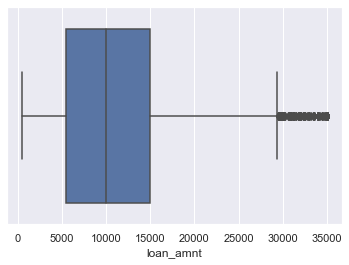

In [41]:
sns.set(style="darkgrid")
sns.boxplot(x=loan_table["loan_amnt"])

In [37]:
axes_style()

NameError: name 'axes_style' is not defined

Additional outliers (was to many too show on the box plot)

In [28]:
from matplotlib.cbook import boxplot_stats  
Outliers = boxplot_stats(loan_table.loan_amnt).pop(0)['fliers']
print(Outliers)

[31825. 35000. 35000. ... 30000. 30000. 35000.]


Vocabulary :)
    
Median = middle value of all loan amounts in data set

Q1 and Q3 shows 25 and 75 percentile of loan amount

Max (Top cap) = greatest value excluding outliers

Min (Bottom cap) = lowest value excluding outliers

Outliers = more (less) than 3/2 times of upper (lower) quartle

### boxplot for loan amount, print median + min + max + Q1+ Q3 + outliers and comment your findings

In [24]:
Purpose = [i for i in loan_table if i.startswith('purpose')]
Melted_table_v2 = pd.melt(loan_table, id_vars=['loan_amnt','term_ 36 months','term_ 60 months'], 
                          value_vars=Purpose , value_name='Purpose')
#Melted_table_v2

Loan_term_table = Melted_table_v2[Melted_table_v2['Purpose'] == 1].iloc[:, [0, 1, 2, 3, 4] ]
Loan_term_table.rename(columns={'variable': 'Loan_purpose'}, inplace=True)
Loan_term_table.head(10)

Term = [y for y in Loan_term_table if y.startswith('term_')]
Melted_table_v3 = pd.melt(Loan_term_table, id_vars=['loan_amnt','Loan_purpose'], 
                          value_vars=Term , value_name='Term')
#Melted_table_v3

Loan_term_table_v2 = Melted_table_v3[Melted_table_v3['Term'] == 1].iloc[:, [0, 1, 2] ]
Loan_term_table_v2.rename(columns={'variable': 'Term 36 / 60'}, inplace=True)
Loan_term_table_v2.head(10)

,loan_amnt,Loan_purpose,Term 36 / 60
1,3000.0,purpose_car,term_ 36 months
2,12000.0,purpose_car,term_ 36 months
4,3500.0,purpose_car,term_ 36 months
5,8000.0,purpose_car,term_ 36 months
6,6000.0,purpose_car,term_ 36 months
7,5500.0,purpose_car,term_ 36 months
8,24000.0,purpose_car,term_ 36 months
10,5400.0,purpose_car,term_ 36 months
11,11200.0,purpose_car,term_ 36 months
12,5000.0,purpose_car,term_ 36 months


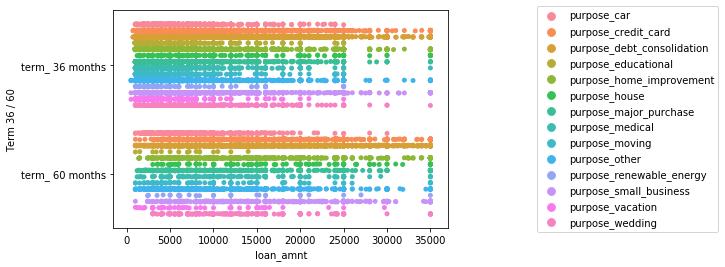

In [25]:
sns.stripplot(x = 'loan_amnt', y = 'Term 36 / 60', 
              hue = 'Loan_purpose', data = Loan_term_table_v2, jitter = 0.05, dodge=True).legend(loc='center left', 
                                                                                     bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()